In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import yticks
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')

np.random.seed(42)
pd.set_option('display.max_columns', 500)

### Data Overview

In [2]:
test_df = pd.read_csv("data/test.csv", parse_dates=['timestamp'], index_col='id')
test_df.shape

(7662, 290)

In [3]:
train_df = pd.read_csv("data/train.csv", parse_dates=['timestamp'], index_col='id')
train_df.shape

(30471, 291)

In [4]:
fix_df = pd.read_excel('data/BAD_ADDRESS_FIX.xlsx').drop_duplicates('id').set_index('id')
train_df.update(fix_df)
test_df.update(fix_df)
print('Fix in train: ', train_df.index.intersection(fix_df.index).shape[0])
print('Fix in test : ', test_df.index.intersection(fix_df.index).shape[0])

Fix in train:  550
Fix in test :  149


In [5]:
train_df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,c

In [6]:
test_df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,c

Check instersection of train and test columns

In [7]:
set(train_df.columns) - set(test_df.columns)

{'price_doc'}

Check type correspondence

In [8]:
d_train = train_df.dtypes.to_dict()
d_train.pop('price_doc')
d_test = test_df.dtypes.to_dict()
matching_dtypes = {key: (d_train[key], d_test[key]) for key in d_train.keys() 
                   if (d_train[key] != d_test[key])}
matching_dtypes

{'floor': (dtype('float64'), dtype('int64')),
 'full_sq': (dtype('int64'), dtype('float64')),
 'material': (dtype('float64'), dtype('int64')),
 'max_floor': (dtype('float64'), dtype('int64')),
 'num_room': (dtype('float64'), dtype('int64'))}

Make type conversion

In [9]:
train_df[['full_sq']] = train_df[['full_sq']].apply(pd.to_numeric, args=(('downcast','float')))
test_df[['floor', 'material', 'max_floor', 'num_room']] = test_df[['floor', 'material', 'max_floor', 'num_room']].apply(pd.to_numeric, args=(('downcast','float')))

Split categorical and numurical features

In [10]:
cols = train_df.columns
cols = cols.drop('price_doc')
num_cols = train_df._get_numeric_data().columns
num_cols = num_cols.drop('price_doc')
categorical_cols = list(set(cols) - set(num_cols))
categorical_cols.remove('timestamp')

In [ ]:
train_df[num_cols].describe()

In [ ]:
test_df[num_cols].describe()

In [ ]:
train_df[categorical_cols].describe()

In [ ]:
test_df[categorical_cols].describe()

Count missing values

In [ ]:
missing_count_train = (train_df.isnull().sum() / train_df.shape[0]).to_dict()
missing_count_train.pop('price_doc')
missing_count_test = (test_df.isnull().sum() / test_df.shape[0]).to_dict()
missing_all = {key: (value, missing_count_test[key]) for key, value in missing_count_train.items() 
       if not (value == 0.0 and missing_count_test[key] == 0)}

ticks, missing_train, missing_test = [], [], []
for key, data_list in missing_all.items():    
    train, test = data_list
    missing_train.append(train * 100.0)
    missing_test.append(test * 100.0)
    ticks.append(key)
    
ind = np.arange(len(ticks))
fig, ax = plt.subplots()
fig.set_size_inches(10, 20)
ax.set_title("Missing Values in % for Train and Test")

barh1 = ax.barh(ind, missing_train)
barh2 = ax.barh(ind, missing_test)
ax.legend((barh1[0], barh2[0]), ('Train', 'Test'))
yticks(ind, ticks);


QQ-plot for target

In [ ]:
from scipy import stats
fig,axes = plt.subplots(ncols=2)
fig.set_size_inches(20, 10)
stats.probplot(train_df.price_doc, plot=axes[0])
# ylog will be log(1+y), as suggested by https://github.com/dmlc/xgboost/issues/446#issuecomment-135555130
stats.probplot(np.log1p(train_df.price_doc), plot=axes[1])

Relationship price with some categorical features

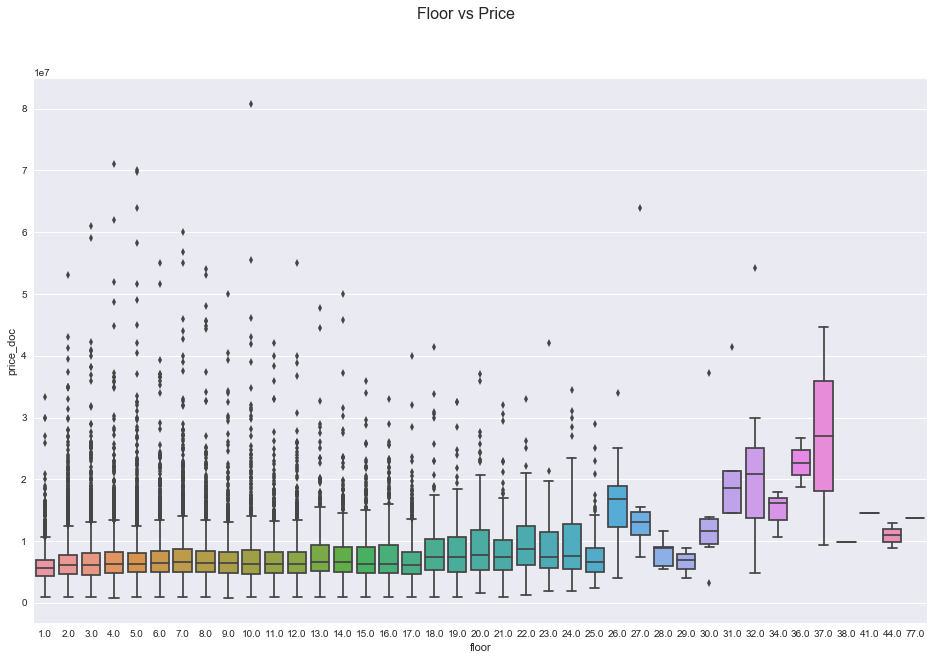

In [28]:
var = 'floor'
data = pd.concat([train_df.price_doc, train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
f.suptitle('Floor vs Price', size=16)
fig = sns.boxplot(x=var, y="price_doc", data=data)

In [ ]:
var = 'num_room'
data = pd.concat([train_df.price_doc, train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
f.suptitle('Number of living rooms vs Price', size=16)
fig = sns.boxplot(x=var, y="price_doc", data=data)

In [ ]:
var = 'build_year'
data = pd.concat([train_df.price_doc, train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
f.suptitle('Build year vs Price', size=16)
fig = sns.boxplot(x=var, y="price_doc", data=data)
for item in fig.get_xticklabels():
    item.set_rotation(90)

In [ ]:
var = 'state'
data = pd.concat([train_df.price_doc, train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
f.suptitle('State vs Price', size=16)
fig = sns.boxplot(x=var, y="price_doc", data=data)
for item in fig.get_xticklabels():
    item.set_rotation(90)

In [ ]:
var = 'sub_area'
data = pd.concat([train_df.price_doc, train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
f.suptitle('Sub area vs Price', size=16)
fig = sns.boxplot(x=var, y="price_doc", data=data)
for item in fig.get_xticklabels():
    item.set_rotation(90)

In [ ]:
var = 'product_type'
data = pd.concat([train_df.price_doc, train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
f.suptitle('Product type vs Price', size=16)
fig = sns.boxplot(x=var, y="price_doc", data=data)

In [ ]:
var = 'ID_metro'
data = pd.concat([train_df.price_doc, train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
f.suptitle('ID_metro vs Price', size=16)
fig = sns.boxplot(x=var, y="price_doc", data=data)
for item in fig.get_xticklabels():
    item.set_rotation(90)

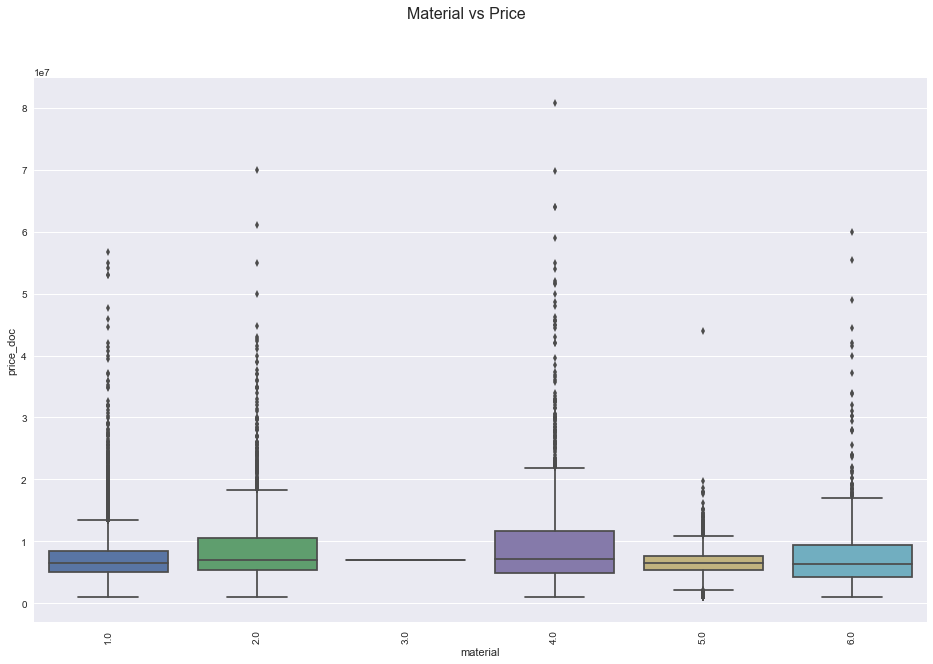

In [81]:
var = 'material'
data = pd.concat([train_df.price_doc, train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
f.suptitle('Material vs Price', size=16)
fig = sns.boxplot(x=var, y="price_doc", data=data)
for item in fig.get_xticklabels():
    item.set_rotation(90)

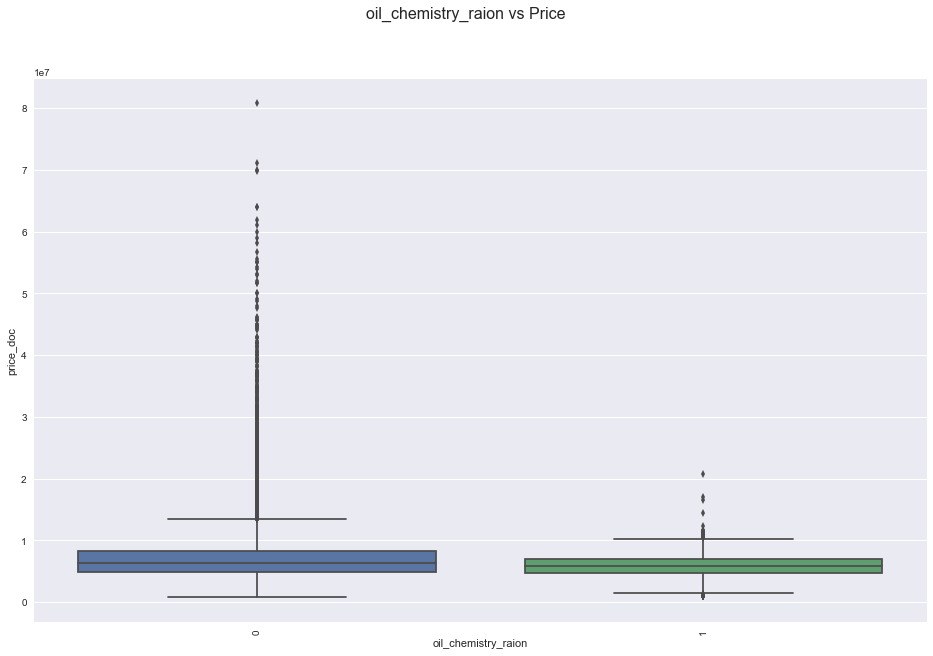

In [83]:
var = 'oil_chemistry_raion'
data = pd.concat([train_df.price_doc, train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
f.suptitle('oil_chemistry_raion vs Price', size=16)
fig = sns.boxplot(x=var, y="price_doc", data=data)
for item in fig.get_xticklabels():
    item.set_rotation(90)

### Data Preparation

#### Clean Data

In [11]:
train_df['floor'].where(train_df['floor'] > 0, 1.0, inplace=True)
train_df['max_floor'] = train_df[['floor', 'max_floor']].max(axis=1)

train_df['full_sq'].where(train_df['full_sq'] > 0, 1.0, inplace=True)
train_df['full_sq'] = train_df[['kitch_sq', 'life_sq', 'full_sq']].max(axis=1)

train_df['life_sq'].where(train_df['life_sq'] > 0, 1.0, inplace=True)
train_df['life_sq'] = train_df[['kitch_sq', 'life_sq']].max(axis=1)

# 0.58 is avg of filtered train and test medians
train_df['life_sq'].where((train_df['life_sq'].div(train_df['full_sq']) >= 0.35), (0.58 + np.random.normal(0, 0.05))*train_df['full_sq'], inplace=True)
train_df['life_sq'].where((train_df['life_sq'].div(train_df['full_sq']) <= 0.85), (0.58 + np.random.normal(0, 0.05))*train_df['full_sq'], inplace=True)

train_df['num_room'].where(train_df['num_room'] > 0, 1.0, inplace=True)

train_df.loc[train_df['build_year'] == 20052009, 'build_year'] = 2007.0
train_df['build_year'].where((train_df['build_year'] > 1000) & (train_df['build_year'] < 3000), np.NaN, inplace=True)

train_df.loc[train_df['state'] == 33.0, 'state'] = 3.0

train_df = train_df[train_df.price_doc.div(train_df.full_sq) <= 500000]
train_df = train_df[train_df.price_doc.div(train_df.full_sq) >= 20000]

In [12]:
train_df.shape

(30032, 291)

#### Naive Feature Engineering

In [13]:
train_df['price_per_sq'] = train_df.price_doc.div(train_df.full_sq)
train_df['extra_sq'] = train_df['full_sq'] - train_df['life_sq']
train_df['rel_life_sq_full_sq'] = train_df['life_sq'].div(train_df['full_sq'])
train_df['rel_kitch_sq_full_sq'] = train_df['kitch_sq'].div(train_df['full_sq'])
train_df['build_age'] = train_df.timestamp.dt.year - train_df.build_year
train_df.loc[train_df['build_age'] > 200, 'state'] = np.NaN

full_all_sum = train_df.full_all.unique().sum() # assume that full_all is unique for each sub_area
train_df['full_all_rel'] = train_df.full_all.div(full_all_sum)

sub_area_avg_build_year = {}
sub_area_n_metro = {}
for sub_area in train_df.sub_area.unique():
    sub_area_avg_build_year[sub_area] = train_df[train_df.sub_area == sub_area].build_year.mean()
    sub_area_n_metro[sub_area] = train_df[train_df.sub_area == sub_area].ID_metro.unique().size
    
sub_area = train_df.sub_area
train_df['sub_area_avg_build_year'] = sub_area.map(sub_area_avg_build_year)
train_df['sub_area_n_metro'] = sub_area.map(sub_area_n_metro)

#### Clean outliers among new features

In [15]:
for sub_area in train_df.sub_area.unique():
    n_point = train_df[train_df.sub_area==sub_area]['price_per_sq'].size
    if n_point >= 40:
        q_up = train_df[train_df.sub_area==sub_area]['price_per_sq'].quantile(0.999)
        train_df = train_df[~((train_df.price_per_sq > q_up) & (train_df.sub_area == sub_area))]
        q_low = train_df[train_df.sub_area==sub_area]['price_per_sq'].quantile(0.001)
        train_df = train_df[~((train_df.price_per_sq < q_low) & (train_df.sub_area == sub_area))]

In [16]:
train_df.shape

(29780, 298)

#### Add external Data

In [17]:
external_df = pd.read_csv("data/avg_price_by_square.txt", sep=';', index_col='sub_area')
train_df['ext_avg_price_by_square'] = train_df['sub_area'].map(external_df.avg_price_per_sq)
train_df['ext_sub_area_rating'] = train_df['sub_area'].map(external_df.rating)

test_df['ext_avg_price_by_square'] = test_df['sub_area'].map(external_df.avg_price_per_sq)
test_df['ext_sub_area_rating'] = test_df['sub_area'].map(external_df.rating)

#### Replace some continuous cols with bins

In [131]:
full_sq_bins = [0, 20, 40, 60, 80, 100, 150, 200, 250, 300, 10**10]
full_sq_names = list(range(1, len(full_sq_bins)))
train_df['bins_full_sq'] = pd.cut(train_df['full_sq'], full_sq_bins, labels=full_sq_names)

life_sq_bins = [0, 20, 40, 60, 80, 100, 150, 200, 250, 300, 10**10]
life_sq_names = list(range(1, len(life_sq_bins)))
train_df['bins_life_sq'] = pd.cut(train_df['life_sq'], life_sq_bins, labels=life_sq_names)

extra_sq_bins = [0, 20, 40, 60, 80, 100, 150, 200, 250, 300, 10**10]
extra_sq_names = list(range(1, len(extra_sq_bins)))
train_df['bins_extra_sq'] = pd.cut(train_df['extra_sq'], extra_sq_bins, labels=extra_sq_names)

kitch_sq_bins = [0, 5, 10, 15, 20, 40, 60, 80, 100, 150, 10**10]
kitch_sq_names = list(range(1, len(kitch_sq_bins)))
train_df['bins_kitch_sq'] = pd.cut(train_df['kitch_sq'], kitch_sq_bins, labels=kitch_sq_names)

building_period_bins = [1000, 1920, 1945, 1970, 1995, 3000]
building_period_names = list(range(1, len(building_period_bins)))
train_df['bins_build_year'] = pd.cut(train_df['build_year'], building_period_bins, labels=building_period_names)

full_all_bins = [0, 50000, 100000, 150000, 200000, 250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 10**10]
full_all_names = list(range(1, len(full_all_bins)))
train_df['bins_full_all'] = pd.cut(train_df['full_all'], full_all_bins, labels=full_all_names)

mkad_km_bins = [0, 1, 2, 3, 5, 10, 20, 30, 40, 50, 100]
mkad_km_names = list(range(1, len(mkad_km_bins)))
train_df['bins_mkad_km'] = pd.cut(train_df['mkad_km'], mkad_km_bins, labels=mkad_km_names)

ttk_km_bins = [0, 1, 2, 3, 5, 10, 20, 30, 40, 50, 100]
ttk_km_names = list(range(1, len(ttk_km_bins)))
train_df['bins_ttk_km'] = pd.cut(train_df['ttk_km'], ttk_km_bins, labels=ttk_km_names)

sadovoe_km_bins = [0, 1, 2, 3, 5, 10, 20, 30, 40, 50, 100]
sadovoe_km_names = list(range(1, len(sadovoe_km_bins)))
train_df['bins_sadovoe_km'] = pd.cut(train_df['sadovoe_km'], sadovoe_km_bins, labels=sadovoe_km_names)

bulvar_ring_km_bins = [0, 1, 2, 3, 5, 10, 20, 30, 40, 50, 100]
bulvar_ring_km_names = list(range(1, len(bulvar_ring_km_bins)))
train_df['bins_bulvar_ring_km'] = pd.cut(train_df['bulvar_ring_km'], bulvar_ring_km_bins, labels=bulvar_ring_km_names)

kremlin_km_bins = [0, 1, 2, 3, 5, 10, 20, 30, 40, 50, 100]
kremlin_km_names = list(range(1, len(kremlin_km_bins)))
train_df['bins_kremlin_km'] = pd.cut(train_df['kremlin_km'], kremlin_km_bins, labels=kremlin_km_names)

zd_vokzaly_avto_km_bins = [0, 1, 2, 3, 5, 10, 20, 30, 40, 50, 100]
zd_vokzaly_avto_km_names = list(range(1, len(zd_vokzaly_avto_km_bins)))
train_df['bins_zd_vokzaly_avto_km'] = pd.cut(train_df['zd_vokzaly_avto_km'], zd_vokzaly_avto_km_bins, labels=zd_vokzaly_avto_km_names)

oil_chemistry_km_bins = [0, 1, 2, 3, 5, 10, 20, 30, 40, 50, 100]
oil_chemistry_km_names = list(range(1, len(oil_chemistry_km_bins)))
train_df['bins_oil_chemistry_km'] = pd.cut(train_df['oil_chemistry_km'], oil_chemistry_km_bins, labels=oil_chemistry_km_names)

green_zone_km_bins = [0, 0.1, 0.2, 0.3, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 5.0]
green_zone_km_names = list(range(1, len(green_zone_km_bins)))
train_df['bins_green_zone_km'] = pd.cut(train_df['green_zone_km'], green_zone_km_bins, labels=green_zone_km_names)

railroad_km_bins = [0, 0.1, 0.2, 0.3, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 5.0, 10, 15, 20, 50]
railroad_km_names = list(range(1, len(railroad_km_bins)))
train_df['bins_railroad_km'] = pd.cut(train_df['railroad_km'], railroad_km_bins, labels=railroad_km_names)

radiation_km_bins = [0, 2, 4, 6, 8, 10, 15, 20, 30, 40, 50, 100]
radiation_km_names = list(range(1, len(radiation_km_bins)))
train_df['bins_radiation_km'] = pd.cut(train_df['radiation_km'], radiation_km_bins, labels=radiation_km_names)

kindergarten_km_bins = [0, 1, 2, 4, 6, 8, 10, 15, 20, 30, 40, 50, 100]
kindergarten_km_names = list(range(1, len(kindergarten_km_bins)))
train_df['bins_kindergarten_km'] = pd.cut(train_df['kindergarten_km'], kindergarten_km_bins, labels=kindergarten_km_names)

public_transport_station_km_bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 5.0, 7.0, 10.0, 15.0, 20.0, 50.0]
public_transport_station_km_names = list(range(1, len(public_transport_station_km_bins)))
train_df['bins_public_transport_station_km'] = pd.cut(train_df['public_transport_station_km'], public_transport_station_km_bins, labels=public_transport_station_km_names)

(array([  2.26120000e+04,   3.13900000e+03,   3.23800000e+03,
          4.87000000e+02,   4.80000000e+01,   7.00000000e+00,
          5.80000000e+01,   1.00000000e+00,   1.90000000e+02,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]),
 array([  0,   1,   2,   4,   6,   8,  10,  15,  20,  30,  40,  50, 100]),
 <a list of 12 Patch objects>)

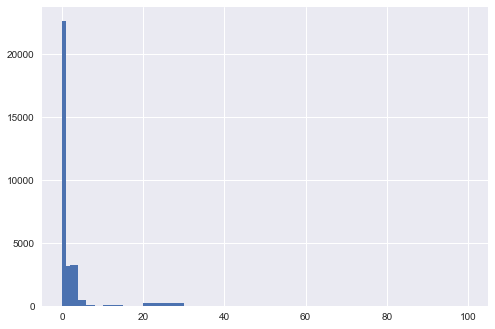

In [127]:
bins  = [0, 1, 2, 4, 6, 8, 10, 15, 20, 30, 40, 50, 100]
plt.hist(train_df.kindergarten_km, bins)

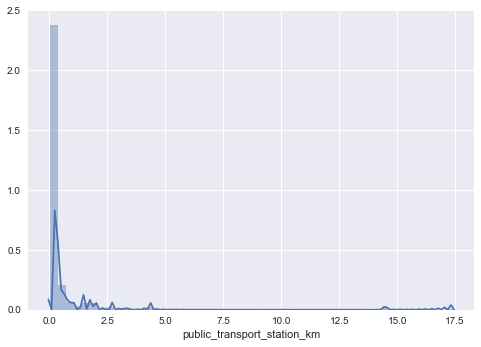

In [129]:
sns.distplot(train_df.public_transport_station_km)

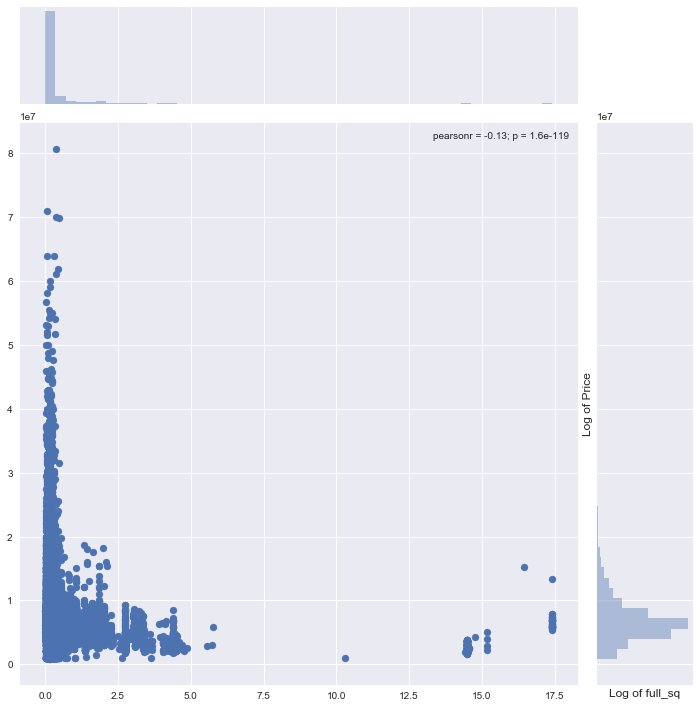

In [130]:
plt.figure(figsize=(12,12))
sns.jointplot(x=train_df.public_transport_station_km.values, y=train_df.price_doc.values, size=10)
plt.ylabel('Log of Price', fontsize=12)
plt.xlabel('Log of full_sq', fontsize=12)
plt.show()

#### Encode Categorical Data

In [19]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
dict_encoder = defaultdict(LabelEncoder)

for col in categorical_cols:    
    train_df[col] = dict_encoder[col].fit_transform(train_df[col])

#### Combine some features by pairs

In [20]:
from itertools import combinations

In [100]:
columns = [
    'bins_full_sq', 
    'bins_life_sq', 
    'bins_extra_sq',
    'bins_kitch_sq',
    'bins_build_year',
    'bins_full_all',
    'bins_mkad_km',
    'bins_ttk_km',
    'bins_sadovoe_km',
    'bins_bulvar_ring_km',
    'bins_kremlin_km',
    'bins_zd_vokzaly_avto_km',
    'bins_oil_chemistry_km',
    'floor', 
    'max_floor',
    'material',
    'num_room',
    'state',
    'product_type',
    'sub_area',
    'ext_sub_area_rating',
    'oil_chemistry_raion',
    'sub_area_n_metro',
    'sub_area_avg_build_year']

columns_pairs = [el for el in combinations(columns, 2)]

for columns_pair in columns_pairs:
    columns_name = columns_pair[0] + '__' + columns_pair[1]
    train_df[columns_name] = train_df[columns_pair[0]].astype(str) + ';' + train_df[columns_pair[1]].astype(str)

#### Clean Test 

In [ ]:
test_df['floor'].where(test_df['floor'] > 0, 1.0, inplace=True)
test_df['max_floor'] = test_df[['floor', 'max_floor']].max(axis=1)

test_df['full_sq'].where(test_df['full_sq'] > 0, 1.0, inplace=True)
test_df['full_sq'] = test_df[['kitch_sq', 'life_sq', 'full_sq']].max(axis=1)

test_df['life_sq'].where(test_df['life_sq'] > 0, 1.0, inplace=True)
test_df['life_sq'] = test_df[['kitch_sq', 'life_sq']].max(axis=1)

# 0.58 is avg of filtered train and test medians
test_df['life_sq'].where((test_df['life_sq'].div(test_df['full_sq']) >= 0.35), (0.58 + np.random.normal(0, 0.05))*test_df['full_sq'], inplace=True)
test_df['life_sq'].where((test_df['life_sq'].div(test_df['full_sq']) <= 0.85), (0.58 + np.random.normal(0, 0.05))*test_df['full_sq'], inplace=True)

test_df['num_room'].where(test_df['num_room'] > 0, 1.0, inplace=True)

test_df.loc[test_df['build_year'] == 20052009, 'build_year'] = 2007.0
test_df['build_year'].where((test_df['build_year'] > 1000) & (test_df['build_year'] < 3000), np.NaN, inplace=True)

test_df.loc[test_df['state'] == 33.0, 'state'] = 3.0

In [ ]:
num_train = len(train_df)
all_df = pd.concat([train_df, test_df])

In [ ]:
train_Y = train_df[['price_doc']]
# ylog will be log(1+y), as suggested by https://github.com/dmlc/xgboost/issues/446#issuecomment-135555130
train_Y = train_Y.assign(price_doc_log1p = lambda x: np.log1p(x.price_doc))

In [ ]:
train_df = train_df.drop(["price_doc"], axis=1)

Add Macro Data

In [ ]:
# From here: https://www.kaggle.com/robertoruiz/sberbank-russian-housing-market/dealing-with-multicollinearity/notebook
macro_cols = ["balance_trade", "balance_trade_growth", "eurrub", "average_provision_of_build_contract",
"micex_rgbi_tr", "micex_cbi_tr", "deposits_rate", "mortgage_value", "mortgage_rate",
"income_per_cap", "rent_price_4+room_bus", "museum_visitis_per_100_cap", "apartment_build"]
macro_df = pd.read_csv("data/macro.csv", parse_dates=['timestamp'], usecols=['timestamp'] + macro_cols)

Build all_df

In [ ]:
num_train = len(train_df)
all_df = pd.concat([train_df, test_df])
all_df = pd.merge_ordered(all_df, macro_df, on='timestamp', how='left')
print(all_df.shape)

Add month-year

In [ ]:
month_year = (all_df.timestamp.dt.month + all_df.timestamp.dt.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
all_df['month_year_cnt'] = month_year.map(month_year_cnt_map)

Add week-year count

In [ ]:
week_year = (all_df.timestamp.dt.weekofyear + all_df.timestamp.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
all_df['week_year_cnt'] = week_year.map(week_year_cnt_map)

Add month and day-of-week

In [ ]:
all_df['month'] = all_df.timestamp.dt.month
all_df['dow'] = all_df.timestamp.dt.dayofweek

Add some relative and average features

In [ ]:
all_df['rel_floor'] = all_df['floor'] / all_df['max_floor'].astype(float)
all_df['rel_kitch_sq'] = all_df['kitch_sq'] / all_df['full_sq'].astype(float)
all_df['rel_life_sq'] = all_df['life_sq'] / all_df['full_sq'].astype(float)
all_df['avg_room_size'] = all_df['full_sq'] / all_df['num_room'].astype(float)

Lets look on relative features

In [ ]:
f, ax = plt.subplots(figsize=(15, 5))

plt.subplot(131)
plt.plot(all_df['rel_floor'])

plt.subplot(132)
plt.plot(all_df['rel_kitch_sq'])

plt.subplot(133)
plt.plot(all_df['rel_life_sq']);

### TODO:

#### Correlations

In [ ]:
corrs_pearson = train_df.corr().abs().unstack().sort_values(ascending=False)
corrs_spearman = train_df.corr('spearman').abs().unstack().sort_values(ascending=False)

In [ ]:
corrs_pearson = corrs_pearson[(corrs_pearson > 0.85) & (corrs_pearson < 1)][0::2]
corrs_spearman = corrs_spearman[(corrs_spearman > 0.85) & (corrs_spearman < 1)][0::2]

In [ ]:
corrs_pearson

In [ ]:
corrs_spearman

It's better to encode categorical features. I use label encoding, but I'm not sure that it's the best practice for such task.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
dict_encoder = defaultdict(LabelEncoder)

for col in categorical_cols:    
    train_df[col] = dict_encoder[col].fit_transform(train_df[col])

In [ ]:
train_X = train_df.drop(["id", "timestamp", "price_doc"], axis=1)
train_y = train_df.price_doc.values

There are a lot of NaN values we should clean them before start to proccessing

In [ ]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
train_X = imp.fit_transform(train_X)

We have too much features, let's try to find most important without cumbersome graphics  
http://scikit-learn.org/stable/modules/feature_selection.html#l1-based-feature-selection

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
lasso = Lasso()
model = lasso.fit(train_X, train_y)

In [ ]:
select_model = SelectFromModel(lasso, prefit=True)

In [ ]:
train_X_new = select_model.transform(train_X)

In [ ]:
train_X_new.shape

In [ ]:
train_X.shape

I can't reduce dimension using this method. I've also tried to use "Tree-based feature selection" but it takes all memory. Without doubt there are exist some pretty methods for reduce dimension but it's not my main aim. I just want to meet with main methods of ML which are mentioned in Andrew Ng course. That's why I take important features from this kernel:
https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-sberbank

In [ ]:
important_features = ['full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 'kitch_sq', 'state']
train_df = train_df[important_features]

Look at selected features from NaN point of view

In [ ]:
missing_count = (train_df.isnull().sum() / train_df.shape[0]) * 100.0
missing_count.sort_values(ascending=False)

Replace NaN

In [ ]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
train_X = imp.fit_transform(train_df)

Standardize features by removing the mean and scaling to unit variance

In [ ]:
from sklearn.preprocessing import StandardScaler
train_X = StandardScaler().fit_transform(train_X.copy())

### Make metric

In [ ]:
def rmsle(predicted, actual):
    return np.sqrt(np.nansum(np.square(np.log(predicted + 1) - np.log(actual + 1)))/float(len(actual)))

In [ ]:
from sklearn.metrics import make_scorer
scorer = make_scorer(rmsle, greater_is_better=False)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
def rmsle_cv(model, X, y, scorer, cv=10):
    # https://stackoverflow.com/questions/19993711/negative-value-for-mean-squared-error
    rmsle = -cross_val_score(model, X=X, y=y, scoring=scorer, cv=cv)
    return(rmsle)

### Submission Function

In [ ]:
def make_sub(filename, predictions):
    df = pd.DataFrame({'id' : range(30474, 38136), 'price_doc' : np.round(predictions, 2)})
    df.to_csv(filename + '.csv', sep=',', index=False, line_terminator='\n', encoding='utf-8')

### Linear Regression without regularization

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression(n_jobs=-1)
reg.fit(train_X, train_y)

In [ ]:
print('Coefficients: \n', reg.coef_)

In [ ]:
train_y_pred = reg.predict(train_X)
print('RMSLE on Training set :', rmsle(train_y_pred, train_y))

In [ ]:
print("CV RMSLE on Training set :", rmsle_cv(model=reg, X=train_X, y=train_y, scorer=scorer))

Predict test

In [ ]:
test_df = test_df[important_features]
test_X = imp.fit_transform(test_df)
test_X = StandardScaler().fit_transform(test_X.copy())

In [ ]:
test_y_pred = reg.predict(test_X)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
indexes = list(range(len(train_y)))
plt.scatter(indexes, train_y, label = "Training data", c='red')
plt.scatter(indexes, train_y_pred, label = "Predicted data", c='indigo');

In [ ]:
make_sub(filename='linear_regr', predictions=test_y_pred)

##### Public Submission Score: 0.41055

---

### Linear Regression with Lasso Regularization (L1 - penalty)

In [ ]:
reg_lasso = linear_model.Lasso(alpha = 0.1)
reg_lasso.fit(train_X, train_y)

In [ ]:
print('Coefficients: \n', reg_lasso.coef_)

In [ ]:
print('Coefficients (Difference): \n', reg_lasso.coef_ - reg.coef_)

In [ ]:
train_y_pred_lasso = reg_lasso.predict(train_X)
print('RMSLE on Training set :', rmsle(train_y_pred_lasso, train_y))

In [ ]:
print('RMSLE on Training set (Difference):', rmsle(train_y_pred, train_y) - rmsle(train_y_pred_lasso, train_y))

In [ ]:
print("CV RMSLE on Training set :", rmsle_cv(model=reg_lasso, X=train_X, y=train_y, scorer=scorer))

In [ ]:
print("CV RMSLE on Training set (Difference):", 
      rmsle_cv(model=reg_lasso, X=train_X, y=train_y, scorer=scorer) - 
      rmsle_cv(model=reg, X=train_X, y=train_y, scorer=scorer))

We can observe a very small difference between Linear Regression models with or without L1.  
I suppose we should to optimize alpha parameter of L1 regulariztion.

In [ ]:
reg_lasso_cv = linear_model.LassoCV(n_alphas=1000, max_iter=1000, cv=10)

In [ ]:
reg_lasso_cv.fit(train_X, train_y)

In [ ]:
reg_lasso_cv.alpha_

In [ ]:
reg_lasso_cv.coef_

In [ ]:
print('Coefficients (Difference): \n', reg_lasso.coef_ - reg_lasso_cv.coef_)

In [ ]:
train_y_pred_lasso_cv = reg_lasso_cv.predict(train_X)
print('RMSLE on Training set :', rmsle(train_y_pred_lasso_cv, train_y))

In [ ]:
print('RMSLE on Training set (Difference):', rmsle(train_y_pred_lasso_cv, train_y) - rmsle(train_y_pred_lasso, train_y))

In [ ]:
print("CV RMSLE on Training set :", rmsle_cv(model=reg_lasso_cv, X=train_X, y=train_y, scorer=scorer))

In [ ]:
print("CV RMSLE on Training set (Difference):", 
      rmsle_cv(model=reg_lasso_cv, X=train_X, y=train_y, scorer=scorer) - 
      rmsle_cv(model=reg_lasso, X=train_X, y=train_y, scorer=scorer))

Predict test

In [ ]:
test_y_pred_lasso_cv = reg_lasso_cv.predict(test_X)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
indexes = list(range(len(train_y)))
plt.scatter(indexes, train_y, label = "Training data", c='red')
plt.scatter(indexes, train_y_pred_lasso_cv, label = "Predicted data", c='indigo');

In [ ]:
make_sub(filename='linear_regr_lasso_cv', predictions=test_y_pred_lasso_cv)

##### Public Submission Score: 0.50625
Predictably, we get worse result in comparison with simple Linear Regression. Because we use only one feature. I suppose it's better to apply L1 regularization to full set of features. However, I don't want to become cowboy (Lasso Master). Therefore, I'll go futher.

### Linear Regression with Ridge Regularization (L2 - penalty)

In [ ]:
alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60, 100]
reg_ridge_cv = linear_model.RidgeCV(alphas=alphas, cv=10)
reg_ridge_cv.fit(train_X, train_y)

In [ ]:
print('Coefficients (Difference): \n', reg.coef_ - reg_ridge_cv.coef_)

In [ ]:
train_y_pred_ridge_cv = reg_ridge_cv.predict(train_X)
print('RMSLE on Training set :', rmsle(train_y_pred_ridge_cv, train_y))

In [ ]:
print('RMSLE on Training set (Difference):', rmsle(train_y_pred, train_y) - rmsle(train_y_pred_ridge_cv, train_y))

In [ ]:
print("CV RMSLE on Training set (Difference):", 
      rmsle_cv(model=reg, X=train_X, y=train_y, scorer=scorer) - 
      rmsle_cv(model=reg_ridge_cv, X=train_X, y=train_y, scorer=scorer))

Predict test

In [ ]:
test_y_pred_ridge_cv = reg_ridge_cv.predict(test_X)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
indexes = list(range(len(train_y)))
plt.scatter(indexes, train_y, label = "Training data", c='red')
plt.scatter(indexes, train_y_pred_ridge_cv, label = "Predicted data", c='indigo');

In [ ]:
make_sub(filename='linear_regr_ridge_cv', predictions=test_y_pred_ridge_cv)

##### Public Submission Score: 0.41069
The PLB score is very close to Linear Regression model without any regularization. Also, we should take into consideration that there isn't signifacant change of score on train data, according to RMLSE metric. Thus, selection of parameters is the room for improvement. However, I want to explore more machine learning algorthms. Like I said, my main aim for this competition isn't rewards but obtaining initial expertise in learning process.

### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

In [ ]:
parameters = {'max_depth':list(range(5, 20, 5)), 'min_samples_split':list(range(100, 150, 10)), 'min_samples_leaf':list(range(5, 20, 5))}

In [ ]:
dtr_cv = GridSearchCV(DecisionTreeRegressor(random_state=0), parameters, cv=50, n_jobs=4)

In [ ]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
train_X = imp.fit_transform(train_df)

In [ ]:
dtr_cv.fit(train_X, train_y)

In [ ]:
print (dtr_cv.best_score_, dtr_cv.best_params_)

In [ ]:
train_y_pred_dtr_cv = dtr_cv.predict(train_X)

In [ ]:
test_X = imp.fit_transform(test_df)

In [ ]:
test_y_pred_dtr_cv = dtr_cv.predict(test_X)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
indexes = list(range(len(train_y)))
plt.scatter(indexes, train_y, label = "Training data", c='red')
plt.scatter(indexes, train_y_pred_dtr_cv, label = "Predicted data", c='indigo');

In [ ]:
make_sub(filename='decission_tree_cv', predictions=test_y_pred_dtr_cv)

##### Public Submission Score: 0.44267

---

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(random_state=42)
results = cross_val_score(rfr, train_X, train_y, cv=10)
print("CV MSE score: {:.2f}%".format(results.mean()*100))

Now, let's try to optimize some parameters of our RandomForest:  
* n_estimators — the number of trees in the forest
* max_depth — the maximum depth of the tree
* min_samples_leaf — the minimum number of samples required to be at a leaf node
* max_features — the number of features to consider when looking for the best split

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
train_mse = []
test_mse = []
temp_train_mse = []
temp_test_mse = []
number_trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

for ntrees in number_trees_grid:
    rfr = RandomForestRegressor(n_estimators=ntrees, random_state=42, n_jobs=-1)
    temp_train_mse = []
    temp_test_mse = []
    for train_index, test_index in kf.split(train_X, train_y):
        X_train, X_test = train_X[train_index], train_X[test_index]
        y_train, y_test = train_y[train_index], train_y[test_index]
        rfr.fit(X_train, y_train)
        temp_train_mse.append(rfr.score(X_train, y_train))
        temp_test_mse.append(rfr.score(X_test, y_test))
    train_mse.append(temp_train_mse)
    test_mse.append(temp_test_mse)

train_mse, test_mse = np.asarray(train_mse), np.asarray(test_mse)
print("Best MSE on CV is {:.2f}% with {} trees".format(max(test_mse.mean(axis=1))*100, 
                                                        number_trees_grid[np.argmax(test_mse.mean(axis=1))]))

Make graph for **n_estimators** validation curve 

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(number_trees_grid, train_mse.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(number_trees_grid, test_mse.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(number_trees_grid, test_mse.mean(axis=1) - test_mse.std(axis=1), test_mse.mean(axis=1) + test_mse.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(number_trees_grid, test_mse.mean(axis=1) - 2*test_mse.std(axis=1), test_mse.mean(axis=1) + 2*test_mse.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylabel("MSE")
ax.set_xlabel("N_estimators");

* optimal n_estimators = 40

In [ ]:
train_mse = []
test_mse = []
temp_train_mse = []
temp_test_mse = []
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]


for max_depth in max_depth_grid:
    rfr = RandomForestRegressor(n_estimators=40, random_state=42, n_jobs=-1, max_depth=max_depth)
    temp_train_mse = []
    temp_test_mse = []
    for train_index, test_index in kf.split(train_X, train_y):
        X_train, X_test = train_X[train_index], train_X[test_index]
        y_train, y_test = train_y[train_index], train_y[test_index]
        rfr.fit(X_train, y_train)
        temp_train_mse.append(rfr.score(X_train, y_train))
        temp_test_mse.append(rfr.score(X_test, y_test))
    train_mse.append(temp_train_mse)
    test_mse.append(temp_test_mse)

train_mse, test_mse = np.asarray(train_mse), np.asarray(test_mse)
print("Best MSE on CV is {:.2f}% with {} max_depth".format(max(test_mse.mean(axis=1))*100, 
                                                        max_depth_grid[np.argmax(test_mse.mean(axis=1))]))

Make graph for **max_depth** validation curve 

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(max_depth_grid, train_mse.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_mse.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_depth_grid, test_mse.mean(axis=1) - test_mse.std(axis=1), test_mse.mean(axis=1) + test_mse.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_depth_grid, test_mse.mean(axis=1) - 2*test_mse.std(axis=1), test_mse.mean(axis=1) + 2*test_mse.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylabel("MSE")
ax.set_xlabel("Max_depth");

* optimal max_depth = 13

In [ ]:
train_mse = []
test_mse = []
temp_train_mse = []
temp_test_mse = []
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]


for min_samples_leaf in min_samples_leaf_grid:
    rfr = RandomForestRegressor(n_estimators=40, random_state=42, n_jobs=-1, min_samples_leaf=min_samples_leaf)
    temp_train_mse = []
    temp_test_mse = []
    for train_index, test_index in kf.split(train_X, train_y):
        X_train, X_test = train_X[train_index], train_X[test_index]
        y_train, y_test = train_y[train_index], train_y[test_index]
        rfr.fit(X_train, y_train)
        temp_train_mse.append(rfr.score(X_train, y_train))
        temp_test_mse.append(rfr.score(X_test, y_test))
    train_mse.append(temp_train_mse)
    test_mse.append(temp_test_mse)

train_mse, test_mse = np.asarray(train_mse), np.asarray(test_mse)
print("Best MSE on CV is {:.2f}% with {} min_samples_leaf".format(max(test_mse.mean(axis=1))*100, 
                                                        min_samples_leaf_grid[np.argmax(test_mse.mean(axis=1))]))

Make graph for **min_samples_leaf** validation curve 

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(min_samples_leaf_grid, train_mse.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(min_samples_leaf_grid, test_mse.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(min_samples_leaf_grid, test_mse.mean(axis=1) - test_mse.std(axis=1), test_mse.mean(axis=1) + test_mse.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(min_samples_leaf_grid, test_mse.mean(axis=1) - 2*test_mse.std(axis=1), test_mse.mean(axis=1) + 2*test_mse.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylabel("MSE")
ax.set_xlabel("Min_samples_leaf");

* optimal min_samples_leaf = 7

In [ ]:
train_mse = []
test_mse = []
temp_train_mse = []
temp_test_mse = []
max_features_grid = [1, 2, 3, 4, 5, 6, 7]


for max_features in max_features_grid:
    rfr = RandomForestRegressor(n_estimators=40, random_state=42, n_jobs=-1, max_features=max_features)
    temp_train_mse = []
    temp_test_mse = []
    for train_index, test_index in kf.split(train_X, train_y):
        X_train, X_test = train_X[train_index], train_X[test_index]
        y_train, y_test = train_y[train_index], train_y[test_index]
        rfr.fit(X_train, y_train)
        temp_train_mse.append(rfr.score(X_train, y_train))
        temp_test_mse.append(rfr.score(X_test, y_test))
    train_mse.append(temp_train_mse)
    test_mse.append(temp_test_mse)

train_mse, test_mse = np.asarray(train_mse), np.asarray(test_mse)
print("Best accuracy on CV is {:.2f}% with {} max_features".format(max(test_mse.mean(axis=1))*100, 
                                                        max_features_grid[np.argmax(test_mse.mean(axis=1))]))

Make graph for **max_features** validation curve 

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(max_features_grid, train_mse.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_features_grid, test_mse.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_features_grid, test_mse.mean(axis=1) - test_mse.std(axis=1), test_mse.mean(axis=1) + test_mse.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_features_grid, test_mse.mean(axis=1) - 2*test_mse.std(axis=1), test_mse.mean(axis=1) + 2*test_mse.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylabel("MSE")
ax.set_xlabel("Max_features");

I prefer to use all features because we have straight validation curve
* max_features = 7

Now, combine all our parameter particular optimizations

In [ ]:
parameters = {'n_estimators': list(range(20, 45, 5)), 'max_depth': list(range(5, 14)), 'min_samples_leaf': list(range(5, 11))}

In [ ]:
rfr = RandomForestRegressor(random_state=42, n_jobs=-1)
gcv = GridSearchCV(rfr, parameters, n_jobs=-1, cv=5, verbose=1)
gcv.fit(train_X, train_y)

In [ ]:
gcv.best_params_

In [ ]:
train_y_pred_gcv = gcv.predict(train_X)

In [ ]:
test_X = imp.fit_transform(test_df)

In [ ]:
test_y_pred_gcv = gcv.predict(test_X)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
indexes = list(range(len(train_y)))
plt.scatter(indexes, train_y, label = "Training data", c='red')
plt.scatter(indexes, train_y_pred_gcv, label = "Predicted data", c='indigo');

In [ ]:
make_sub(filename='random_forest_cv', predictions=test_y_pred_gcv)

##### Public Submission Score: 0.41915

RandomForest looks like the most robust algorithm and this fact isn't seem strange. I suppose that we should use raw data (most features) to improve current results. Moreover, feature engineering is good room for improvement. But, I aslo want to involve k-nearest algoritm and only after that go on to the next stages (all features, feature engineering, reduce dimension methods, gbm)